# The Emerging Field of Signal Processing on Graph
> scholar review

- toc:true
- branch: master
- badges: true
- comments: false
- author: 최서연
- categories: [review]

## The Emerging Field of Signal Processing on Graph
- Extending High-Dimensional Data Analysis to Networks and Other Irregular Domains;

#### abstract

In applications such as social, energy, transportation, sensor, and neuronal networks, high-dimensional data naturally reside on the vertices of weighted graphs. **The emerging field of signal processing on graphs merges algebraic and spectral graph theoretic concepts with computational harmonic analysis to process such signals on graphs.** In this tutorial overview, we outline the main challenges of the area, discuss different ways to define graph spectral domains, which are the analogues to the classical frequency domain, and highlight the importance of incorporating the irregular structures of graph data domains when processing signals on graphs. We then review methods to generalize fundamental operations such as filtering, translation, modulation, dilation, and downsampling to the graph setting, and survey the localized, multiscale transforms that have been proposed to efficiently extract information from high-dimensional data on graphs. We conclude with a brief discussion of open issues and possible extensions.

- vertices 정점
- algebraic 대수
- harmonic 고주파
- dilation 확장

#### I. INTRODUCTION

*Graphs are generic data representation forms which are useful for describing the geometric structures of data domains in numerous applications, including social, energy, transportation, sensor, and neuronal networks.* *The weight associated with each edge in the graph often represents the similarity between the two vertices it connects.* The connectivities and edge weights are either dictated by the physics of the problem at hand or inferred from the data. For instance, the edge weight may be inversely proportional to the physical distance between nodes in the network. The data on these graphs can be visualized as a finite collection of samples, with one sample at each vertex in the graph. Collectively, we refer to these samples as a **graph signal**. An example of a graph signal is shown in Figure 1.

- inferred 유추
- ~ of the problem at hand 당면한 문제의~
- inversely 반대로


 graph가 domain이다!

We find examples of graph signals in many different engineering and science fields. In transportation networks, we may be interested in analyzing epidemiological data describing the spread of disease, census data describing human migration patterns, or logistics data describing inventories of trade goods (e.g. gasoline or grain stocks). In brain imaging, it is now possible to non-invasively infer the anatomical connectivity of distinct functional regions of the cerebral cortex [1], and this connectivity can be represented by a weighted graph with the vertices corresponding to the functional regions of interest. Thus, noisy fMRI images can be viewed as signals on weighted graphs. *Weighted graphs are also commonly used to represent similarities between data points in statistical learning problems for applications such as machine vision [2] and automatic text classification [3].* In fact, much of the literature on graph-based data analysis techniques emanates from the statistical learning community, as graph-based methods became especially popular for the **semi-supervised learning problem** where the objective is to classify unknown data with the help of a few labelled samples (e.g., [4]–[9]). In image processing, there has been a recent spike *in graph-based filtering methods that build non-local and semi-local graphs to connect the pixels of the image based not only on their physical proximity, but also on noisy versions of the image to be processed* (e.g., [10]–[12] and references therein). Such methods are often able to better recognize and account for image edges and textures.

- epidemiological 역학
- cerebral 대뇌
- cortex 피질
- non-invasively 비침투적

Common data processing tasks in these applications include filtering, denoising, inpainting, and compressing graph signals. How can data be processed on irregular data domains such as arbitrary graphs? What are the best ways to efficiently extract information, either statistically or visually, from this high dimensional data, for the purposes of storage, communication, and analysis? Is it possible to use operators or algorithms from the classical digital signal processing toolboxes? These are just a few of the questions that underlie the field of signal processing on graphs.

- arbitrary 임의의

*Fig. 1.*
- A random positive graph signal on the vertices of the Petersen graph. The height of each blue bar represents the signal value at the vertex where the bar originates.

##### A. The Main Challenges of Signal Processing on Graphs

The ability of wavelet, time-frequency, curvelet and other localized transforms to sparsely represent different classes of high-dimensional data such as audio signals and images that lie on regular Euclidean spaces has led to a number of resounding successes in the aforementioned signal processing tasks (see, e.g., [13, Section II] for a recent survey of transform methods).

- wavelet 잔물결
- time-frequency 시간 주파수
- curvelet 잔곡선
- aforementioned 앞서 언급한

*Both a signal on a graph with N vertices and a classical discrete-time signal with N samples can be viewed as vectors in $R^N$*. However, **a major obstacle to the application of the classical signal processing techniques in the graph setting is that processing the graph signal in the same ways as a discrete-time signal ignores key dependencies arising from the irregular data domain.**$^1$ Moreover, many extremely simple yet fundamental concepts that underlie classical signal processing techniques become significantly more challenging in the graph setting:

$^1$- Throughout, we refer to signal processing concepts for analog or discretetime signals as “classical,” in order to differentiate them from concepts defined in the graph signal framework.

To translate an analog signal f(t) to the right by 3, we simply perform a change of variable and consider f(t−3). However, it is not immediately clear what it means to translate a graph signal “to the right by 3.” The change of variable technique will not work as there is no meaning to f(◦ − 3) in the graph setting. One naive option would be to simply label the vertices from 1 to N and define f(◦ − 3) := f(mod(◦ − 3, N)), **but it is not particularly useful to define a generalized translation that depends heavily on the order in which we (arbitrarily) label the vertices.** *The unavoidable fact is that weighted graphs are irregular structures that lack a shift-invariant notion of translation.*$^2$

$^2$ - The exception is the class of highly regular graphs such as a ring graph that have circulant graph Laplacians. Grady and Polimeni [14, p.158] refer to such graphs as shift invariant graphs.

Modulating a signal on the real line by multiplying by a complex exponential corresponds to translation in the Fourier domain. However, **the analogous spectrum in the graph setting is discrete and irregularly spaced** and it is therefore non-trivial to define an operator that corresponds to translation in the graph spectral domain.

- corresponds 해당
- non-trivial 사소하지 않은

We intuitively downsample a discrete-time signal by deleting every other data point, for example. Yet, what does it mean to downsample the signal on the vertices of the graph shown in Figure 1? There is not an obvious notion of “every other vertex” of a weighted graph.

- intuitively 직관적으로

Even when we do fix a notion of downsampling, in order to create a multiresolution on graphs, we need a method to generate a coarser version of the graph that somehow captures the structural properties embedded in the original graph.

- multiresolution 다중해상도
- coarser 거친

In addition to dealing with the irregularity of the data domain, the graphs in the previously mentioned applications can feature a large number of vertices, and therefore many data samples. In order to scale well with the size of the data, signal processing techniques for graph signals should employ localized operations that compute information about the data at each vertex by using data from a small neighborhood of vertices close to it in the graph.

- employ 쓰다

Therefore, the overarching challenges of processing signals on graphs are **1) in cases where the graph is not directly dictated to us by the application, deciding how to construct a weighted graph that captures the geometric structure of the underlying data domain; 2) incorporating the graph structure into localized transform methods; 3) at the same time, leveraging invaluable intuitions developed from years of signal processing research on Euclidean domains; and 4) developing computationally efficient implementations of the localized transforms, in order to extract information from high-dimensional data on graphs and other irregular data domains.**

- overarching challenges 중요한 
- leveraging 활용
- intuitions 직관

To address these challenges, the emerging field of signal processing on graphs merges algebraic and spectral graph theoretic concepts with computational harmonic analysis. There is an extensive literature in both algebraic graph theory (e.g., [15]) and spectral graph theory (e.g., [16], [17] and references therein); however, the bulk of the research prior to the past decade focused on analyzing the underlying graphs, as opposed to signals on graphs.

Finally, we should note that researchers have also designed localized signal processing techniques for other irregular data domains such as polygonal meshes and manifolds. This work includes, for example, low-pass filtering as a smoothing operation to enhance the overall shape of an object [18], transform coding based on spectral decompositions for the compression of geometry data [19], and multiresolution representations of large meshes by decomposing one surface into multiple levels with different details [20]. There is no doubt that such work has inspired and will continue to inspire new signal processing techniques in the graph setting.

- polygonal meshes 다각형 메시
- manifold 서로 다른 다양한 흐름을 한 장소에 모으고 연결하는 방식으로 이루어진 장치
- decompositions 분해

##### B. Outline of the Paper

**The objective of this paper is to offer a tutorial overview of the analysis of data on graphs from a signal processing perspective.** In the next section, we discuss different ways to encode the graph structure and define graph spectral domains, which are the analogues to the classical frequency domain. Section III surveys some generalized operators on signals on graphs, such as filtering, translation, modulation, and downsampling. These operators form the basis for a number of localized, multiscale transform methods, which we review in Section IV. We conclude with a brief mention of some open issues and possible extensions in Section V.

#### II. THE GRAPH SPECTRAL DOMAINS

Spectral graph theory has historically focused on constructing, analyzing, and manipulating graphs, as opposed to signals on graphs. It has proved particularly useful for the construction of expander graphs [21], graph visualization [17, Section 16.7], spectral clustering [22], graph coloring [17, Section 16.9], and numerous other applications in chemistry, physics, and computer science (see, e.g., [23] for a recent review).

In the area of signal processing on graphs, spectral graph theory has been leveraged as a tool to define frequency spectra and expansion bases for graph Fourier transforms. In this section, *we review some basic definitions and notations from spectral graph theory, with a focus on how it enables us to extend many of the important mathematical ideas and intuitions from classical Fourier analysis to the graph setting.*

##### A. Weighted Graphs and Graph Signals

We are interested in analyzing signals defined on an undirected, connected, weighted graph $G = \left\{V, E,W\right\}$, which consists of a finite set of vertices $V$ with $|V| = N$, a set of edges $E$, and a weighted adjacency matrix $W$. If there is an edge $e = (i, j)$ connecting vertices $i$ and $j$, the entry $W_{i,j}$ represents the weight of the edge; otherwise, $W_{i,j} = 0$. If the graph $G$ is not connected and has $M$ connected components $(M > 1)$, **we can separate signals on $G$ into $M$ pieces corresponding to the $M$ connected components, and independently process the separated signals on each of the subgraphs.**

*When the edge weights are not naturally defined by an application*, one common way to define the weight of an edge connecting vertices i and j is via a thresholded Gaussian kernel weighting function:
$$W_{i,j}=\begin{cases}{exp(-\frac{[dist(i,j)]^2}{2\theta^2})} & \quad \text{if } dist(i,j) \leq κ \\ 0 & \quad \text{otherwise} \end{cases},   (1)$$

for some parameters $\theta$ and $κ$. In (1), **$dist(i, j)$ may represent a physical distance between vertices $i$ and $j$**, or the Euclidean distance between two feature vectors describing $i$ and $j$, the latter of which is especially common in graph-based semi-supervised learning methods. A second common method is to connect each vertex to its k-nearest neighbors based on the physical or feature space distances. For other graph construction methods, see, e.g., [14, Chapter 4]. 

A signal or function $f : V \rightarrow R$ defined on the vertices of the graph may be represented as a vector $f ∈ R^N$ , where the $i^{th}$ component of the vector $f$ represents the function value at the $i^{th}$ vertex in $V$.$^3$ The graph signal in Figure 1 is one such example.

$^3$ - In order to analyze data residing on the edges of an unweighted graph, one option is to build its line graph, where we associate a vertex to each edge and connect two vertices in the line graph if their corresponding edges in the original graph share a common vertex, and then analyze the data on the vertices of the line graph.

- graph ${\cal G}:= \{ {\cal V},{\cal E},\bf{W} \}$
- a weighted adjacency matrix $W$
- the entry $W_{i,j}$ represents the weight of the edge

-------------------------

(논문내용공부) 

`-` weighted graph ${\cal G}$는 ${\cal V}$, ${\cal E}$ 그리고 ${\bf W}$를 원소로하는 집합이다. 즉 ${\cal G}:= \{ {\cal V},{\cal E},\bf{W} \}$. 여기에서 ${\cal V}$는 노드(node, vertex)들의 집합이고 ${\cal E}$는 엣지들의 집합이다. 그리고 ${\bf W}$는 매트릭스이다. 

`-` 아래와 같이 단순한 시계열을 고려하자. 

In [7]:
import matplotlib.pyplot as plt 
import numpy as np

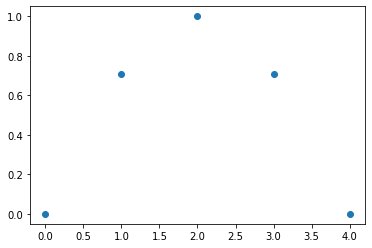

In [20]:
f=[np.sin(0), np.sin(3.14/4), np.sin(3.14/2), np.sin(3.14*3/4), np.sin(3.14)]
plt.plot(f,'o')

노드들의 집합 ${\cal V}$는 아래와 같이 표현가능하다. 

${\cal V} = \{1,2,3,4,5\}=\{\text{node1}, \text{node2},\text{node3},\text{node4},\text{node5}\}$

이때 $|{\cal V}|=N=5$ 이다. 여기에서 $|{\cal V}|$는 집합 ${\cal V}$의 크기를 의미한다. 

엣지는 노드들이 연결되어 있는 구조를 의미하는데, 편의상 아래와 같은 연결구조를 가진다고 하자.
```
1 --- 2 --- 3 --- 4 --- 5     or     node1 --- node2 --- node3 --- node4 --- node5 
```
그렇다면 연결된 노드들을 순서쌍으로 표현하면 $(1,2)$, $(2,3)$, $(3,4)$, $(4,5)$ 와 같이 된다. 

$(1,2)$의 의미는 노드1과 노드2가 연결되었다는 의미이며 $(1,2)$를 edge라고 부르고 기호는 $e$를 사용한다. 

엣지들의 집합을 ${\cal E}$라고 표현한다. 따라서 이 예제의 경우 ${\cal E}=\{ (1,2), (2,3), (3,4), (4,5) \}$이 된다. 

vertex $i$와 vertex $j$ 사이의 거리는 $dist(i,j)$로 표현한다. 이 예제의 경우는 아래와 같다. 
- $dist(1,1)=0$ 

- $dist(1,2)=\left| 0-\frac{3.14}{4} \right|$ 

- $dist(1,3)=\left|0-\frac{3.14}{2}\right|$

- $dist(1,4)=\left|0-\frac{3\times 3.14}{4}\right|$

- $dist(1,5)=\left|0-3.14\right|$

- $dist(2,1)=\left| 0-\frac{3.14}{4} \right|$ 

- $dist(2,2)=0$ 

- $dist(2,3)=\left| \frac{3.14}{4}-\frac{3.14}{2} \right|$ 

- ... 


함수로 구현하면 

In [33]:
def dist(i,j):
    _temp = [0, 3.14/4, 3.14/2, 3.14*3/4, 3.14]
    return np.abs(_temp[i-1]-_temp[j-1])

In [34]:
dist(1,1)

0

In [35]:
dist(1,2)

0.785

In [36]:
dist(1,3)

1.57

In [37]:
dist(1,4)

2.355

In [38]:
dist(1,5)

3.14

이 예제에 한정하여 $W_{ij}$를 구해보자. 

$W_{i,j}=\begin{cases}{\exp\left(-\frac{[dist(i,j)]^2}{2\theta^2}\right)} & \quad \text{if } dist(i,j) \leq \kappa \\ 0 & \quad \text{otherwise}, \end{cases} \quad \cdots   (1)$

In [42]:
def weighting(i,j,theta=1,kappa=100): 
    return np.exp(- dist(i,j)**2 / (2*theta**2) ) if dist(i,j) <= kappa else 0 

In [43]:
weighting(1,1)

1.0

In [45]:
weighting(1,2)

0.7348326446862543

In [47]:
weighting(1,3)

0.29157733739266345

In [48]:
weighting(1,4)

0.06247351950130583

이제 ${\bf W}$를 구해보자. 

In [51]:
W = [[weighting(i,j) for i in range(1,6)] for j in range(1,6)] 

In [54]:
W=np.array(W)
W

array([[1.        , 0.73483264, 0.29157734, 0.06247352, 0.00722795],
       [0.73483264, 1.        , 0.73483264, 0.29157734, 0.06247352],
       [0.29157734, 0.73483264, 1.        , 0.73483264, 0.29157734],
       [0.06247352, 0.29157734, 0.73483264, 1.        , 0.73483264],
       [0.00722795, 0.06247352, 0.29157734, 0.73483264, 1.        ]])

> $\theta$와 $\kappa$의 의미는? 

signal or function $f$는 $f:{\cal V} \to \mathbb{R}$와 같이 정의한다. 이는 정의역(=도메인)이 ${\cal V}$이고 공역이 실수인 함수라는 의미이다. 

우리의 예제로 치면 아래와 같다. 

$f(1)$ = `f[0]` =  0

$f(2)$ = `f[1]` =  3.14/4

$\dots$

벡터 $N$차원 ${\bf f}$는 ${\bf f}=(f(0),f(1),\dots, f(N)$으로 정의하는데 우리의 예제로 치면 ${\bf f}$ = `f`이라고 생각할 수 있다. 

`-` 아무튼 ${\cal V}$ , ${\cal E}$, ${\bf W}$ 3개를 원소로 가지는 집합을 ${\cal G}$라고 정의한다는 의미. (집합을 원소로 가지는 집합을 collection이라 하는데 여기에서는 몰라도 무방함) 

--- 

##### B. The Non-Normalized Graph Laplacian

The non-normalized graph Laplacian, also called the combinatorial graph Laplacian, is defined as $Ł := D −W$, where the degree matrix $D$ is a diagonal matrix whose $i^{th}$ diagonal element $d_i$ is equal to the sum of the weights of all the edges incident to vertex $i$. The graph Laplacian is a difference operator, as, for any signal $f ∈ R^N$ , it satisfies
$$(Łf)(i)=\sum_{j \in N_i}W_{i,j}[f(i)-f(j)],$$
where the neighborhood $N_i$ is the set of vertices connected to vertex $i$ by an edge. More generally, we denote by $N (i, k)$ the set of vertices connected to vertex $i$ by a path of $k$ or fewer edges.

Because the graph Laplacian $Ł$ is a real symmetric matrix, it has a complete set of orthonormal eigenvectors, which we denote by {$u_l$}$_{l=0,1,...,N−1}$.$^4$ These eigenvectors have associated real, non-negative eigenvalues {$λ_l$}$_{l=0,1,...,N−1}$ satisfying $Łu_l = λ_{l}u_{l}$, for $l = 0, 1, . . . , N − 1$. Zero appears as an eigenvalue with multiplicity equal to the number of connected components of the graph [16], and thus, since we consider connected graphs, we assume the graph Laplacian eigenvalues are ordered as $0 = λ_0 < λ_1 ≤ λ_2... ≤ λ_{N−1} := λ_{max}$. We denote the entire spectrum by $σ(Ł)$ := {$λ_0, λ_1, . . . , λ_{N−1}$}.

$^4$ - Note that there is not necessarily a unique set of graph Laplacian eigenvectors, but we assume throughout that a set of eigenvectors is chosen and fixed.

--- 

- orthonormal 직교 정규
- eigenvectors 고유 벡터

직교(orthogonal)와 정규직교(orthonormal), 그리고 직교행렬(orthogonal matrix)
- 직교행렬(orthogonal matrix): 자신의 전치행렬transpose를 역행렬로 갖는 정방행렬, $AA^T=E$
    - 직교행렬(orthogonal matrix)의 열벡터들은 서로 othonormal정규직교한 성질을 가지고 있다.
    - 즉, 직교 행렬을 구성하는 열벡터(혹은 행벡터)들을 $v_1,v_2,...,v_n$이라 했을때 이들은 모두 단위 벡터unit vector이면서 또한 서로 수직인 성질을 갖는다.
    - 따라서 직교행렬othogonal matrix는 그 행렬을 구성하는 열벡터(행벡터)들이 서로 수직이면서orthogonal 크기가 1인normal한 행렬로 정의될 수 있다.


> warning: orthonormal matrix 정규직교 행렬은 올바른 표현이 아님

> note: 벡터들이 orthogonal하다=서로 수직이다. 벡터들이 orthonormal하다=서로 수직이면서 크기가 1인 단위벡터이다, 행렬이 orthogonal하다=$AA^T=E$이다=행렬을 구성하는 열벡터, 또는 행벡터들이 orthonormal하다

--- 

##### C. A Graph Fourier Transform and Notion of Frequency

The classical Fourier transform
$$\hat{f}(\xi):=<f,e^{2\pi{i}\xi{t}}>=\int_Rf(t)e^{-2\pi{i}\xi{t}}dt$$
is the expansion of a function $f$ in terms of the complex exponentials, which are the eigenfunctions of the one-dimensional Laplace operator:
$$-\bigtriangleup(e^{2\pi{i}\xi{t}})=\frac{∂^2}{∂t^2}e^{2\pi{i}\xi{t}}=(2\pi\xi)^2e^{2\pi{i}\xi{t}}\dotsi (2)$$
Analogously, we can define the graph Fourier transform $\hat{f}$ of any function $f ∈ R^N$ on the vertices of $G$ as the expansion of $f$ in terms of the eigenvectors of the graph Laplacian:
$$\hat{f}(\lambda_l):=<f,u_l>=\sum_{i=1}^N f(i)u_{l}^{*}(i) \dotsi (3)$$
The inverse graph Fourier transform is then given by
$$f(i)=\sum_{l=0}^{N-1}\hat{f}(\lambda_l)u_l(i) \dotsi (4)$$

In classical Fourier analysis, the eigenvalues {$(2πξ)^2$}$_{ξ∈R}$ in (2) carry a specific notion of frequency: **for $ξ$ close to zero (low frequencies), the associated complex exponential eigenfunctions are smooth, slowly oscillating functions, whereas for $ξ$ far from zero (high frequencies), the associated complex exponential eigenfunctions oscillate much more rapidly.** In the graph setting, the graph Laplacian eigenvalues and eigenvectors provide a similar notion of frequency. For connected graphs, the Laplacian eigenvector $u_0$ associated with the eigenvalue 0 is constant and equal to $\frac{1}{\sqrt{N}}$ at each vertex. The graph Laplacian eigenvectors associated with low frequencies $λ_l$ vary slowly across the graph; i.e., **if two vertices are connected by an edge with a large weight, the values of the eigenvector at those locations are likely to be similar.** The eigenvectors associated with larger eigenvalues oscillate more rapidly and are more likely to have dissimilar values on vertices connected by an edge with high weight. This is demonstrated in both Figure 2, which shows different graph Laplacian eigenvectors for a random sensor network graph, and Figure 3, which shows the number $|Z_{G}(·)|$ of zero crossings of each graph Laplacian eigenvector. The set of zero crossings of a signal f on a graph G is defined as
$$Z_{G}(f) := {e = (i, j) ∈ E : f(i)f(j) < 0} ;$$
that is, **the set of edges connecting a vertex with a positive signal to a vertex with a negative signal.**

*Fig. 2.*
- Three graph Laplacian eigenvectors of a random sensor network graph. The signals’ component values are represented by the blue (positive) and black (negative) bars coming out of the vertices. Note that $u_{50}$ contains many more zero crossings than the constant eigenvector $u_0$ and the smooth Fiedler vector $u_1$.

*Fig. 3.*
- The number of zero crossings, $|Z_G(u_l)|$ in (a) and $|Z_G(\tilde{u}_l)|$ in (b), of the non-normalized and normalized graph Laplacian eigenvectors for the random sensor network graph of Figure 2, respectively (the latter of which is defined in Section II-F). In both cases, the Laplacian eigenvectors associated with larger eigenvalues cross zero more often, confirming the interpretation of the graph Laplacian eigenvalues as notions of frequency.

--- 

푸리에 변환: 임의의 입력 신호를 다양한 주파수를 갖는 주기합수들의 합으로 분해하여 표현
- 0에 가까운 엣지(저주파)에 대해 복소수 지수 고유함수는 부드럽고 천천히 진동하는 함수지만 0과 먼 엣지(고주파)에 대해 관련된 복소수 지수 고유함수는 훨씬 빠르게 진동한다.
    - 푸리에 스펙트럼을 이미지로 나타내면 검은 바탕에 한 흰점만 존재
    - 해결하기 위해 log취함

--- 

##### D. Graph Signal Representations in Two Domains

The graph Fourier transform (3) and its inverse (4) give us a way to equivalently represent a signal in two different domains: the vertex domain and the graph spectral domain. **While we often start with a signal $g$ in the vertex domain, it may also be useful to define a signal $\hat{g}$ directly in the graph spectral domain. We refer to such signals as kernels.** In Figures 4(a) and 4(b), one such signal, a heat kernel, is shown in both domains. Analogously to the classical analog case, the graph Fourier coefficients of a smooth signal such as the one shown in Figure 4 decay rapidly. Such signals are compressible as they can be closely approximated by just a few graph Fourier coefficients (see, e.g., [24]–[26] for ways to exploit this compressibility).

*Fig. 4.*
- Equivalent representations of a graph signal in the vertex and graphspectral domains. (a) A signal g that resides on the vertices of the Minnesota road graph [27] with Gaussian edge weights as in (1). The signal’s component values are represented by the blue (positive) and black (negative) bars coming out of the vertices. (b) The same signal in the graph spectral domain. In this case, the signal is a heat kernel which is actually defined directly in the graph spectral domain by $\hat{g}(λ_l) = e^{−5λ_l}$ . The signal plotted in (a) is then determined by taking an inverse graph Fourier transform (4) of $\hat{g}$.

##### E. Discrete Calculus and Signal Smoothness with Respect to the Intrinsic Structure of the Grap

When we analyze signals, it is important to emphasize that properties such as smoothness are with respect to the intrinsic structure of the data domain, which in our context is the weighted graph. **Whereas differential geometry provides tools to incorporate the geometric structure of the underlying manifold into the analysis of continuous signals on differentiable manifolds, discrete calculus provides a “set of definitions and differential operators that make it possible to operate the machinery of multivariate calculus on a finite, discrete space [14, p. 1].”**

- intrinsic 본질적인

To add mathematical precision to the notion of smoothness with respect to the intrinsic structure of the underlying graph, we briefly present some of the discrete differential operators defined in [4], [6]–[8], [14], [28]–[30].$^5$ The edge derivative of a signal $f$ with respect to edge $e = (i, j)$ at vertex $i$ is defined as
$$\left.\frac{∂f}{∂e}\right|_i := \sqrt{W_{i,j}}[f(j) − f(i)] ,$$
and the graph gradient of f at vertex i is the vector
$$\bigtriangledown_if := \left[{\left.\frac{∂f}{∂e}\right|_i}_{e∈E s.t. e=(i,j) for some j∈V}\right]$$
Then the local variation at vertex $i$
$$||\bigtriangledown_if||_2:=\left[\sum_{e∈E s.t. e=(i,j) for some j∈V}\left(\left.\frac{∂f}{∂e}\right|_i\right)^2\right]^\frac{1}{2}$$
$$=\left[\sum_{j∈N_i}W_{i,j}j [f(j) − f(i)]^2\right]^\frac{1}{2}$$
provides a measure of local smoothness of $f$ around vertex $i$, as it is small when the function $f$ has similar values at $i$ and all neighboring vertices of $i$.

$^5$ - Note that the names of many of the discrete calculus operators correspond to the analogous operators in the continuous setting. In some problems, the weighted graph arises from a discrete sampling of a smooth manifold. In that situation, the discrete differential operators may converge – possibly under additional assumptions – to their namesake continuous operators as the density of the sampling increases. For example, [31] - [34] examine the convergence of discrete graph Laplacians (normalized and non-normalized) to continuous manifold Laplacians.

For notions of global smoothness, the discrete p-Dirichlet form of $f$ is defined as
$$S_p(f) := \frac{1}{p}\sum_{i∈V}||\bigtriangledown_if||_2^p=\frac{1}{p}\sum_{i∈V}\left[\sum_{j∈N_i}W_{i,j}[f(j) − f(i)]^2\right]^\frac{p}{2}\dots (5)$$
When $p = 1$, $S_1(f)$ is the total variation of the signal with respect to the graph. When $p = 2$, we have
$$S_2(f) = \frac{1}{2}\sum_{i∈V}\sum{j∈N_i}W_{i,j} [f(j) − f(i)]^2$$
$$=\sum_{(i,j)∈E}W_{i,j} [f(j) − f(i)]^2 = fTŁf. \dots(6)$$
$S_2(f)$ is known as the graph Laplacian quadratic form [17], and the semi-norm $||f||_Ł$ is defined as
$$||f||_Ł:= ||Ł^{\frac{1}{2}} f||_2 =\sqrt{f^{T}Łf} =\sqrt{S_2(f)}$$
Note from (6) that the quadratic form $S_2(f)$ is equal to zero if and only if $f$ is constant across all vertices (which is why $||f||_Ł$ is only a semi-norm), and, more generally, $S_2(f)$ is small when the signal $f$ has similar values at neighboring vertices connected by an edge with a large weight; i.e., when it is smooth.

Returning to the graph Laplacian eigenvalues and eigenvectors, the Courant-Fischer Theorem [35, Theorem 4.2.11] tells us they can also be defined iteratively via the Rayleigh quotient as
$$λ_0 = min_{f∈R^N and ||f||_{2}=1}{f^{T}Łf},\dots (7)$$
$$\text{and  } λ_l = min_{f∈R^N and ||f||_{2}=1 and f⊥span [u_0,...,u_{l−1}] }{f^{T}Łf} , l = 1, 2, . . . , N − 1, \dots(8) $$

- quotient 지수, 몫

where the eigenvector $u_l$ is the minimizer of the $l^{th}$ problem. From (6) and (7), we see again why $u_0$ is constant for connected graphs. Equation (8) explains why the graph Laplacian eigenvectors associated with lower eigenvalues are smoother, and provides another interpretation for why the graph Laplacian spectrum carries a notion of frequency.

In summary, the connectivity of the underlying graph is encoded in the graph Laplacian, which is used to define both a graph Fourier transform (via the graph Laplacian eigenvectors) and different notions of smoothness. Example 1 in the box below demonstrates how both the smoothness and the graph spectral content of a graph signal depend on the underlying graph.

##### F. Other Graph Matrices

The basis {$u_l$}$_{l=0,1,...,N−1}$ of graph Laplacian eigenvectors is just one possible basis to use in the forward and inverse graph Fourier transforms (3) and (4). A second popular option is to normalize each weight $W_{i,j}$ by a factor of $\frac{1}{\sqrt{d_id_j}}$ . Doing so leads to the normalized graph Laplacian, which is defined as $\hat{Ł} := D^{−\frac{1}{2}} ŁD^{−\frac{1}{2}}$ , or, equivalently.

$$(\tilde{Ł}f)(i) = \frac{1}{\sqrt{d_i}}\sum_{j∈N_i} W_{i,j} \left[\frac{f(i)}{\sqrt{d_i}}−\frac{f(j)}{\sqrt{d_j}}\right].$$

The eigenvalues $\left\{\tilde{λ}_l\right\}_{l=0,1,...,N−1}$ of the normalized graph Laplacian of a connected graph G satisfy
$$0= \tilde{\lambda_0} < \tilde{λ}_1 ≤ . . . ≤ \tilde{λ}_{max} ≤ 2,$$
with $\tilde{λ}_{max} = 2$ if and only if $G$ is bipartite; i.e., the set of vertices $V$ can be partitioned into two subsets $V_1$ and $V_2$ such that every edge $e ∈ E$ connects one vertex in $V_1$ and one vertex in V2. We denote the normalized graph Laplacian eigenvectors by $\left\{\tilde{u}_{l}\right\}_{l=0,1,...,N−1}$. As seen in Figure 3(b), the spectrum of
$Ł$ also carries a notion of frequency, with the eigenvectors associated with higher eigenvalues generally having more zero crossings. However, unlike $u_0$, the normalized graph Laplacian eigenvector $\tilde{u}_0$ associated with the zero eigenvalue is not a constant vector.

**The normalized and non-normalized graph Laplacians are both examples of generalized graph Laplacians [36, Section 1.6], also called discrete Schrodinger operators**. A generalized graph Laplacian of a graph G is any symmetric matrix whose $i, j^{th}$ entry is negative **if there is an edge connecting vertices $i$ and $j$, equal to zero if $i \neq j$ and i is not connected to j, and may be anything if $i = j$.**

A third popular matrix that is often used in dimensionality reduction techniques for signals on graphs is the random walk matrix $P := D^{−1}W$. Each entry $P_{i,j}$ describes the probability of going from vertex $i$ to vertex $j$ in one step of a Markov random walk on the graph $G$. For connected, aperiodic graphs, each row of $P^t$ converges to the stationary distribution of the random walk as $t$ goes to infinity. Closely related to the random walk matrix is the asymmetric graph Laplacian, which is defined as $Ł_a := I_N − P$, where $I_N$ is the $N × N$ identity matrix.$^6$ Note that $Ł_a$ has the same set of eigenvalues as $\tilde Ł$, and if $\tilde u_l$ is an eigenvector of $\tilde L$ associated with $\tilde λ_l$ , then $D^{-\frac{1}{2}} \tilde u_l$ is an eigenvector of $Ł_a$ associated with the eigenvalue $\tilde λ_l$ .

- aperiodic 비주기적인
- converges 수렴

$^6$ - $Ł_a$ is not a generalized graph Laplacian due to its asymmetry.

As discussed in detail in the next section, both the normalized and non-normalized graph Laplacian eigenvectors can be used as filtering bases. There is not a clear answer as to when to use the normalized graph Laplacian eigenvectors, when to use the non-normalized graph Laplacian eigenvectors, and when to use some other basis. *The normalized graph Laplacian has the nice properties that its spectrum is always contained in the interval [0, 2]* and, for bipartite graphs, the spectral folding phenomenon [37] can be exploited. However, the fact that the non-normalized graph Laplacian eigenvector associated with the zero eigenvalue is constant is a useful property in extending intuitions about DC components of signals from classical filtering theory.

- exploited 이용하다
- ?DC components

*Example 1 (Importance of the underlying graph):*
- In the figure above, we plot the same signal $f$ on three different unweighted graphs with the same set of vertices, but different edges. The top row shows the signal in the vertex domains, and the bottom row shows the signal in the respective graph spectral domains. The smoothness and graph spectral content of the signal both depend on the underlying graph structure. In particular, the signal $f$ is smoothest with respect to the intrinsic structure of $G_1$, and least smooth with respect to the intrinsic structure of $G_3$. This can be seen (i) visually; (ii) through the Laplacian quadratic form, as $f^TŁ_1f = 0.14, f^TŁ_2f = 1.31$, and $f^TŁ_3f = 1.81$; and (iii) through the graph spectral representations, where the signal has all of its energy in the low frequencies in the graph spectral plot of $\hat{f}$ on $G_1$, and more energy in the higher frequencies in the graph spectral plot of $\hat{f}$ on $G_3$.

#### III. GENERALIZED OPERATORS FOR SIGNALS ON GRAPHS

In this section, we review different ways to generalize fundamental operations such as filtering, translation, modulation, dilation, and downsampling to the graph setting. These generalized operators are the ingredients used to develop the localized, multiscale transforms described in Section IV.

##### A. Filtering

The first generalized operation we tackle is filtering. We start by extending the notion of frequency filtering to the graph setting, and then discuss localized filtering in the vertex domain.

1) Frequency Filtering: In classical signal processing, frequency filtering is the process of representing an input signal as a linear combination of complex exponentials, and amplifying or attenuating the contributions of some of the component complex exponentials:
$$\hat{f}_{out}(\xi) = \hat{f}_{in}(ξ)\hat{h}(ξ),\dots(9)$$
where $\hat{h}(·)$ is the transfer function of the filter. Taking an inverse Fourier transform of (9), multiplication in the Fourier domain corresponds to convolution in the time domain.
$$f_{out}(t) = \int_R \hat{f}_{in}(ξ)\hat{h}(ξ)e^{2πiξt}dξ\dots(10)$$
$$=\int_R f_{in}(τ)h(t − τ )dτ =: (f_{in} ∗ h)(t). \dots(11)$$

- amplifying 증폭
- attenuating 감소

Once we fix a graph spectral representation, and thus our notion of a graph Fourier transform (in this section, we use the eigenvectors of $Ł$, but $\tilde{Ł}$ can also be used), we can directly generalize (9) to define frequency filtering, or graph spectral filtering, as
$$\hat{f}_{out}(λ_l) = \hat{f}in(λ_l)\hat{h}(λ_l), \dots(12)$$
or, equivalently, taking an inverse graph Fourier transform
$$f_{out}(i) = \sum^{N−1}_{l=0} \hat{f}_{in}(λ_l)\hat{h}(λ_l)u_l(i). \dots(13)$$
Borrowing notation from the theory of matrix functions [38], we can also write (12) and (13) as $f_{out} = \hat{h}(Ł)f_{in}$, where
$$\hat{h}(Ł) := U \begin{bmatrix}\hat{h}(\lambda_0) &  & 0 \\ & \ddots & \\ 0 & & \hat{\lambda}_{N-1}\end{bmatrix} U^T. \dots (14)$$

The basic graph spectral filtering (12) can be used to implement discrete versions of well-known continuous filtering techniques such as Gaussian smoothing, bilateral filtering, total variation filtering, anisotropic diffusion, and non-local means filtering (see, e.g., [39] and references therein). In particular, many of these filters arise as solutions to variational problems to regularize ill-posed inverse problems such as denoising, inpainting, and super-resolution. One example is the discrete regularization framework
$$min_{f} [{||f − y||^{2}_{2} + γS_{p}(f)}] , \dots (15)$$
where $S_{p}(f)$ is the p-Dirichlet form of (5). References [4]– [11], [14, Chapter 5], and [28]–[30] discuss (15) and other energy minimization models in detail, as well as specific filters that arise as solutions, relations between these discrete graph spectral filters and filters arising out of continuous partial differential equations, and applications such as graph-based image processing, mesh smoothing, and statistical learning. In Example 2, we show one particular image denoising application of (15) with $p = 2$.

- bilateral 양자
- anisotropic 
- diffusion 확산

2) Filtering in the Vertex Domain: To filter a signal in the vertex domain, we simply write the output $f_{out}(i)$ at vertex i as a linear combination of the components of the input signal at vertices within a K-hop local neighborhood of vertex $i$:
$$f_{out}(i) = b_{i,i}f_{in}(i) + \sum_{j∈N(i,K)}b_{i,j}f_{in}(j), \dots(18)$$
for some constants {$b_{i,j}$}$ _{i,j∈V}$ . Equation (18) just says that filtering in the vertex domain is a localized linear transform.

We now briefly relate filtering in the graph spectral domain (frequency filtering) to filtering in the vertex domain. When the frequency filter in (12) is an order $K$ polynomial $\hat{h}(λ_l) = \sum^{K}_{k=0} a_kλ^{k}_{l}$ for some constants {$a_k$}$_{k=0,1,...,K}$, we can also interpret the filtering equation (12) in the vertex domain. From (13), we have
$$\hat{f}_{out}(i) =\sum^{N−1}_{l=0}\hat{f}_{in}(λ_l)\hat{h}(λ_l)u_l(i)$$
$$=\sum^{N}_{j=1}f_{in}(j)\sum^{K}_{k=0}a_k \sum^{N−1}_{l=0}λ^{k}_{l} u^{∗}_{l}(j)u_l(i)$$
$$=\sum^{N}_{j=1}f_{in}(j)\sum^{K}_{k=0}a_k(Ł^{k})_{i,j}. \dots(19)$$
Yet, $(Ł^{k})_{i,j} = 0$ when the shortest-path distance $d_G(i, j)$ between vertices i and j (i.e. the minimum number of edges comprising any path connecting i and j) is greater than k [41, Lemma 5.2]. Therefore, we can write (19) exactly as in (18), with the constants defined as
$$b_{i,j} := \sum^{K}_{k=d_G (i,j)}a_k(Ł^{k})_{i,j}.$$
So when the frequency filter is an order K polynomial, the frequency filtered signal at vertex $i$, $f_{out}(i)$, is a linear combination of the components of the input signal at vertices within a K-hop local neighborhood of vertex $i$. This property can be quite useful when relating the smoothness of a filtering kernel to the localization of filtered signals in the vertex domain.

*Example 2 (Tikhonov regularization):*
- We observe a noisy graph signal $y = f_0 + η$, where $η$ is uncorrelated additive Gaussian noise, and we wish to recover $f_0$. To enforce a priori information that the clean signal $f_0$ is smooth with respect to the underlying graph, we include a regularization term of the form $f^TŁf$, and, for a $fixed γ > 0$, solve the optimization problem
$$argmin_{f}\left\{||f − y||^{2}_{2} + γf^TŁf\right\}.\dots (16)$$
The first-order optimality conditions of the convex objective function in (16) show that (see, e.g., [4], [29, Section III-A], [40, Proposition 1]) the optimal reconstruction is given by 
$$f_∗(i) =\sum^{N−1}_{l=0}\left[\frac{1}{1 + γλ_l}\hat{y}(λ_l)\right]u_l(i), \dots(17)$$
or, equivalently, $f = \hat{h}(Ł)y$, where $\hat{h}(λ) := \frac{1}{1+γλ }$can be viewed as a low-pass filter.
 As an example, in the figure below, we take the $512 \times 512$ cameraman image as $f_0$ and corrupt it with additive Gaussian noise with mean zero and standard deviation 0.1 to get a noisy signal $y$. We then apply two different filtering methods to denoise the signal. In the first method, we apply a symmetric two-dimensional Gaussian low-pass filter of size 72 x 72 with two different standard deviations: 1.5 and 3.5. In the second method, we form a semi-local graph on the pixels by connecting each pixel to its horizontal, vertical, and diagonal neighbors, and setting the Gaussian weights (1) between two neighboring pixels according to the similarity of the noisy image values at those two pixels; i.e., *the edges of the semi-local graph are independent of the noisy image, but the distances in (1) are the differences between the neighboring pixel values in the noisy image*. For the Gaussian weights in (1), we take $θ = 0.1$ and $κ = 0$. We then perform the low-pass graph filtering (17) with $γ = 10$ to reconstruct the image. This method is a variant of the graph-based anisotropic diffusion image smoothing method of [11].
 In all image displays, we threshold the values to the [0,1] interval. The bottom row of images is comprised of zoomed-in versions of the top row of images. Comparing the results of the two filtering methods, we see that in order to smooth sufficiently in smoother areas of the image, *the classical Gaussian filter also smooths across the image edges*. *The graph spectral filtering method does not smooth as much across the image edges, as the geometric structure of the image is encoded in the graph Laplacian via the noisy image*.

##### B. Convolution

We cannot directly generalize the definition (11) of a convolution product to the graph setting, because of the term $h(t−τ )$. However, *one way to define a generalized convolution product for signals on graphs is to replace the complex exponentials in (10) with the graph Laplacian eigenvectors [42]*:
$$(f ∗ h)(i) := \sum^{N−1}_{l=0}\hat{f}(λ_l)\hat{h}(λ_l)u_l(i),\dots (20)$$
which enforces the property that convolution in the vertex domain is equivalent to multiplication in the graph spectral domain.

##### C. Translation

The classical translation operator is defined through the change of variable $(T_υf)(t) := f(t − υ)$, which, as discussed earlier, we cannot directly generalize to the graph setting. However, we can also view the classical translation operator $T_υ$ as a convolution with a delta centered at $υ$; i.e., $(T_υf)(t) = (f ∗ δυ)(t)$ in the weak sense. Thus, one way to define a generalized translation operator $T_n : R^N → R^N$ is via generalized convolution with a delta centered at vertex $n$ [41], [42]:
$$(T_ng) (i) := \sqrt{N}(g ∗ δ_n)(i)=^{(20)}\sqrt{N}\sum^{N−1}_{l=0} \hat{g}(λ_l)u^{∗}_{l}(n)u_l(i), \dots(21)$$
where
$$\delta_{n}(i) =   \begin{cases}     1       & \quad \text{if } i = n\\     0  & \quad \text{otherwise}  \end{cases} \dots(22)$$
A few remarks about the generalized translation (21) are in order. First, we do not usually view it as translating a signal $g$ defined in the vertex domain, but rather as **a kernelized operator** acting on a kernel $\hat{g}(·)$ defined directly in the graph spectral domain. To translate this kernel to vertex n, the $l^{th}$ component of the kernel is multiplied by $u^{∗}_{l}(n)$, and then an inverse graph Fourier transform is applied. Second, the normalizing constant $\sqrt{N}$ in (21) ensures that the translation operator preserves the mean of a signal; i.e., $\sum^{N}_{i=1}(T_ng)(i) = \sum^{N}_{i=1} g(i)$. Third, the smoothness of the kernel gˆ(·) controls the localization of $T_ng$ around the center vertex $n$; that is, the magnitude $(T_ng)(i)$ of the translated kernel at vertex $i$ decays as the distance between $i$ and $n$ increases [41]. This property can be seen in Figure 5, where we translate a heat kernel around to different locations of the Minnesota graph. Finally, unlike the classical translation operator, the generalized translation operator (21) is not generally an isometric operator $(||T_ng||_2 \neq ||g||_2)$, due to the possible localization of the graph Laplacian eigenvectors$(µ > \sqrt{\frac{1}{N}})$.

*Fig. 5.*
- The translated signals (a) T100g, (b) T200g, and (c) T2000g, where g is the heat kernel shown in Figures 4(a) and 4(b).

- isometric 등척성, 수축의

##### D. Modulation and Dilation

In addition to translation, many classical transform methods rely on modulation or dilation to localize signals’ frequency content. The classical modulation operator
$$(M_ωf)(t) := e^{2πiωt}f(t) \dots(23)$$
represents a translation in the Fourier domain:
$$\hat{M_ω}f(ξ) = \hat{f}(ξ − ω), ∀ξ ∈ R.$$
One way to define generalized modulation in the graph setting is to **replace the multiplication by a complex exponential (an eigenfunction of the 1D Laplacian operator) in (23) with a multiplication by a graph Laplacian eigenvector**:
$$(M_kg) (i) := \sqrt{N}u_k(i)g(i). (24)$$
The generalized modulation (24) is not exactly a translation in the graph spectral domain due to the discrete and irregular nature of the spectrum; however, as shown in [42, Figure 3], if a kernel $\hat{g}(·)$ is localized around 0 in the graph spectral domain, then $\hat{M_kg}$ is localized around $λ_k$

- dilation 확장

For s > 0, dilation or scaling of an analog signal $f$ in the time domain is given by
$$(D_sf)(t) := \frac{1}{s}f \left(\frac{t}{s}\right). \dots(25)$$
We cannot directly generalize (25) to the graph setting, because $\frac{i}{s}$ is not likely to be in the domain $V$ for all $i ∈ V$. Instead, we can take the Fourier transform of (25) 
$$(\hat{D_s}f)(ξ) = \hat{f}(sξ), \dots(26)$$
and generalize (26) to the graph setting. Assuming we start with a kernel $\hat{g} : R_+ → R$, we can define a generalized graph dilation by [41]
$$(\hat{D_sg})(λ) := \hat{g}(sλ). \dots(27)$$
Note that, unlike the generalized modulation (24), the generalized dilation (27) requires the kernel $\hat{g}(·)$ to be defined on the entire real line, not just on $σ(Ł)$ or $[0, λ_{max}]$. 

##### E. Graph Coarsening, Downsampling, and Reduction

Many multiscale transforms for signals on graphs require successively coarser versions of the original graph that preserve properties of the original graph such as the intrinsic geometric structure (e.g., some notion of distance between vertices), connectivity, graph spectral distribution, and sparsity. The process of transforming a given (fine scale) graph $G = ${ $V, E,W$} into a coarser graph $G^{reduced} =$ {$V^{reduced} , E^{reduced} ,W^{reduced}$} with fewer vertices and edges, while also preserving the aforementioned properties, is often referred to as graph coarsening or coarsegraining [46].

- intrinsic 본질적인

This process can be split into two separate but closely related subtasks: 1) identifying a reduced set of vertices $V^{reduced}$, and 2) assigning edges and weights, $E^{reduced}$ and $W^{reduced}$, to connect the new set of vertices. When an additional constraint that $V^{reduced} ⊂ V$ is imposed, the first subtask is often referred to as graph downsampling. The second subtask is often referred to as graph reduction or graph contraction.

In the special case of a bipartite graph, two subsets can be chosen so that every edge connects vertices in two different subsets. Thus, for bipartite graphs, there is a natural way to downsample by a factor of two, as there exists a notion of “every other vertex.”

For non-bipartite graphs, the situation is far more complex, and a wide range of interesting techniques for the graph coarsening problem have been proposed by graph theorists, and, in particular, by the numerical linear algebra community. To mention just a few, Lafon and Lee [46] downsample based on diffusion distances and form new edge weights based on random walk transition probabilities; the greedy seed selection algorithm of Ron et al. [47] leverages an algebraic distance measure to downsample the vertices; recursive spectral bisection [48] repeatedly divides the graph into parts according to the polarity (signs) of the Fiedler vectors $u_1$ of successive subgraphs; Narang and Ortega [49] minimize the number of edges connecting two vertices in the same downsampled subset; and another generally-applicable method which yields the natural downsampling on bipartite graphs ( [36, Chapter 3.6]) is to partition $V$ into two subsets according to the polarity of the components of the graph Laplacian eigenvector $u_{N−1}$ associated with the largest eigenvalue $λ_{max}$. We refer readers to [47], [50] and references therein for more thorough reviews of the graph coarsening literature.

- recursive 반복되는
- polarity 극성

There are also many interesting connections between graph coarsening, graph coloring [51], spectral clustering [22], and nodal domain theory [36, Chapter 3]. Finally, in a closely related topic, Pesenson (e.g., [52]) has extended the concept of bandlimited sampling to signals defined on graphs by showing that certain classes of signals can be downsampled on particular subgraphs and then stably reconstructed from the reduced set of samples.

#### IV. LOCALIZED, MULTISCALE TRANSFORMS FOR SIGNALS ON GRAPHS

The increasing prevalence of signals on graphs has triggered a recent influx of localized transform methods specifically designed to analyze data on graphs. These include wavelets on unweighted graphs for analyzing computer network traffic [53], diffusion wavelets and diffusion wavelet packets [24], [44], [45], the “top-down” wavelet construction of [54], graph dependent basis functions for sensor network graphs [55], lifting based wavelets on graphs [49], [56], multiscale wavelets on balanced trees [57], spectral graph wavelets [41], critically sampled two-channel wavelet filter banks [37], [58], and a windowed graph Fourier transform [42].

Most of these designs are generalizations of the classical wavelet filter banks used to analyze signals on Euclidean domains. The feature that makes the classical wavelet transforms so useful is their ability to simultaneously localize signal information in both time (or space) and frequency, and thus exploit** the time-frequency resolution trade-off better than the Fourier transform**. In a similar vein, the desired property of wavelet transforms on graphs is to localize graph signal contents in both the vertex and graph spectral domains. In the classical setting, locality is measured in terms of the “spread” of the signal in time and frequency, and uncertainty principles (see [59, Sec. 2.6.2]) describe the trade-off between time and frequency resolution. Whether such a trade-off exists for graph signals remains an open question. However, some recent works have begun to define different ways to measure the “spread” of graph signals in both domains. For example, [60] defines the spatial spread of any signal $f$ around a center vertex $i$ on a graph $G$ as
$$∆^{2}_{G,i}(f) := \frac{1}{||f||^{2}_{2}}\sum_{j∈V}[d_G(i, j)]^2[f(j)]^2. \dots(28)$$
Here, {$[f(j)]^2/||f||^2$}$_{j=1,2,...,N}$ can be interpreted as a probability mass function (pmf) of signal $f$, and $∆^{2}_{G,i}(f)$ is the variance of the geodesic distance function $d_G(i, .) : V → R$ at node $i$, in terms of this spatial pmf. The spatial spread of a graph signal can then be defined as
$$∆^{2}_{G}(f) := min_{i∈V} \left\{∆^{2}_{G,i}(f)\right\} .$$

Similarly, the spectral spread of a graph signal can be defined as:
$$∆^{2}_{σ}(f) := min_{µ∈R_+}\left\{\frac{1}{||f||^{2}_{2}}\sum_{λ∈σ(L)}[\sqrt{λ}−\sqrt{µ}]^2 [\hat{f}(λ)^2\right\}, \dots(29)$$
where $\left\{[\hat{f}(λ)]^2/||f||^{2}_{2}\right\}_{λ=λ_0,λ_1,...,λ_{max}}$ is the pmf of $f$ across the spectrum of the Laplacian matrix, and $\sqrt{µ}$ and $∆^{2}_{σ}$ (f) are the mean and variance of $\sqrt{λ}$, respectively, in the distribution given by this spectral pmf.$^7$ If we do not minimize over all $µ$ but rather fix $µ = 0$ and also use the normalized graph Laplacian matrix $\hat{L}$ instead of $Ł$, the definition of spectra spread in (29) reduces to the one proposed in [60].

$^7$ - Note that the definitions of spread presented here are heuristically defined and do not have a well-understood theoretical background. If the graph is not regular, the choice of which Laplacian matrix $(L$ or $\tilde{L})$ to use for computing spectral spreads also affects the results. The purpose of these definitions and the subsequent examples is to show that a trade-off exists between spatial and spectral localization in graph wavelets

Depending on the application under consideration, other desirable features of a graph wavelet transform may include perfect reconstruction, critical sampling, orthogonal expansion, and a multi-resolution decomposition [37].

In the remainder of this section, we categorize the existing graph transform designs and provide simple examples. The graph wavelet transform designs can broadly be divided into two types: vertex domain designs and graph spectral domain designs.

##### A. Vertex Domain Designs

*The vertex domain designs of graph wavelet transforms are based on the spatial features of the graph, such as node connectivity and distances between vertices.* Most of these localized transforms can be viewed as particular instances of filtering in the vertex domain, as in (18), where the output at each node can be computed from the samples within some K-hop neighborhood around the node. The graph spectral properties of these transforms are not explicitly designed. Examples of vertex domain designs include random transforms [55], graph wavelets [53], lifting based wavelets [49], [61], [62], and tree wavelets [57].

The random transforms [55] for unweighted graphs compute either a weighted average or a weighted difference at each node in the graph with respect to a k-hop neighborhood around it.Thus, the filter at each node has a constant, non-zero weight  within the k-hop neighborhood and zero weight outside, where the parameter c is chosen so as to guarantee invertibility $f$ the transform.

The graph wavelets of Crovella and Kolaczyk [53] are functions $ψ_{k,i} : V → R$, localized with respect to a range P of scale/location indices (k, i), which at a minimum satisfy j∈V ψk,i(j) = 0 (i.e. a zero DC response). This graph wavelet transform is described in more detail in Section IV-C. 

Lifting based transforms for graphs [49], [61], [62] are extensions of the lifting wavelets originally proposed for 1D signals by Sweldens [63]. In this approach, the vertex set is first partitioned into sets of even and odd nodes, $V = V_O ∪V_E$ . Each odd node computes its prediction coefficient using its own data and data from its even neighbors. Then each even node computes its update coefficients using its own data and the prediction coefficients of its neighboring odd nodes.

In [57], Gavish et al. construct tree wavelets by building a balanced hierarchical tree from the data defined on graphs, and then generating orthonormal bases for the partitions defined at each level of the tree using a modified version of the standard one-dimensional wavelet filtering and decimation scheme.

##### B. Graph Spectral Domain Designs

The graph spectral domain designs of graph wavelets are based on the spectral features of the graph, which are encoded, e.g., in the eigenvalues and eigenvectors of one of the graph matrices defined in Section II. Notable examples in this category include diffusion wavelets [24], [44], spectral graph wavelets [41], and graph quadrature mirror filter banks (graph-QMF filter banks) [37]. The general idea of the graph spectral designs is to construct bases that are localized in both the svertex and graph spectral domains.

- quadrature

The diffusion wavelets [24], [44], for example, are based on compressed representations of powers of a diffusion operator, such as the one discussed in Example 3. The localized basis functions at each resolution level are downsampled and then orthogonalized through a variation of the Gram-Schmidt orthogonalization scheme.

The spectral graph wavelets of [41] are dilated, translated versions of a bandpass kernel designed in the graph spectral domain of the non-normalized graph Laplacian $Ł$. They are discussed further in Section IV-C

Another graph spectral design is the two-channel graph-QMF filter bank proposed for bipartite graphs in [37]. The resulting transform is orthogonal and critically sampled, and also yields perfect reconstruction. In this design, the analysis and synthesis filters at each scale are designed using a single prototype transfer function $\hat{h}(\tilde{λ})$, which satisfies:
$$\hat{h}^2(\tilde{λ}) + \hat{h}(2 − \tilde{λ}) = 2, \dots(30)$$
where $\tilde{λ}$ is an eigenvalue in the normalized graph Laplacian spectrum. The design extends to any arbitrary graph via a bipartite subgraph decomposition.

*Example 3 (Diffusion operators and dilation):*
- The heat diffusion operator $R = e^{−Ł}$ is an example of a discrete diffusion operator (see, e.g., [43] and [14, Section 2.5.5] for general discussions of discrete diffusions and [24, Section 4.1] for a formal definition and examples of symmetric diffusion semigroups). Intuitively, applying different powers $τ$ of the heat diffusion operator to a signal $f$ describes the flow of heat over the graph when the rates of flow are proportional to the edge weights encoded in $Ł$. The signal $f$ represents the initial amount of heat at each vertex, and $R^τ f = \left(e^{−τŁ}\right) f$ represents the amount of heat at each vertex after time $τ$ . The time variable $τ$ also provides a notion of scale. When $τ$ is small, the $entry \left(e^{−τŁ}\right)_{i,j}$ for two vertices that are far apart in the graph is very small, and therefore $\left(\left(e^{−τŁ}\right)f\right) (i)$ depends primarily on the values $f(j)$ for vertices $j$ close to $i$ in the graph. As $τ$ increases, $\left(\left(e^{−τŁ}\right)f\right) (i)$ also depends on the values $f(j)$ for vertices $j$ farther away from $i$ in the graph. Zhang and Hancock [11] provide a more detailed mathematical justification behind this migration from domination of the local geometric structures to domination of the global structure of the graph as $τ$ increases, as well as a nice illustration of heat diffusion on a graph in [11, Figure 1].
 Using our notations from (14) and (27), we can see that applying a power $τ$ of the heat diffusion operator to any signal $f ∈ R^N$ is equivalent to filtering the signal with a dilated heat kernel:
$$R^τf =\left(e^{−τŁ}\right)f = \hat{(D_τ g)}(Ł)f = f ∗ (D_τg),$$
where the filter is the heat kernel $\hat{g}(λ_l) = e^{−λ_l}$, similar to the one shown in Figure 4(b).
- In the figure below, we consider the cerebral cortex graph described in [41], initialize a unit of energy at the vertex 100 by taking $f = δ_{100}$, allow it to diffuse through the network for different dyadic amounts of time, and measure the amount of energy that accumulates at each vertex. Applying different powers of the heat diffusion operator can be interpreted as graph spectral filtering with a dilated kernel. The original signal $f = δ_{100}$ on the cerebral cortex graph is shown in (a); the filtered signals $\left\{f ∗ (D_{2^{k}−1}g)\right\}_{k=1,2,3,4} = \left\{R^{2^{k}−1} f\right\}_{k=1,2,3,4}$ are shown in (b)-(e); and the different dilated kernels corresponding to the dyadic powers of the diffusion operator are shown in (f). Note that dyadic powers of diffusion operators of the form $\left\{R^{2^{k−1}}\right\}_{k=1,2,...}$ are of central importance to diffusion wavelets and diffusion wavelet packets [24], [44], [45], which we discuss in Section IV.

##### C. Examples of Graph Wavelet Designs

In order to build more intuition about graph wavelets, we present some examples using one vertex domain design and one graph spectral domain design.

For the vertex domain design, we use the graph wavelet transform (CKWT) of Crovella and Kolaczyk [53] as an example. These wavelets are based on the geodesic or shortest path distance $d_G(i, j)$. Define $∂N (i, τ )$ to be the set of all vertices $j ∈ V$ such that $d_G(i, j) = τ$ . Then the wavelet function $ψ^{CKWT}_{k,i} : V → R$ at scale k and center vertex $i ∈ V$ can be written as
$$ψ^{CKWT}_{k,i} (j) = \frac{a_{k,τ}}{|∂N (i, τ )|}, ∀_j ∈ ∂N (i, τ ), \dots(31)$$
for some constants $\left\{a_{k,τ}\right\}_{τ=0,1,...,k}$. Thus, each wavelet is constant across all vertices $j ∈ ∂N (i, τ )$ that are the same distance from the center vertex i, and the value of the wavelet at the vertices in $∂N (i, τ )$ depends on the distance $τ$ . If $τ > k, a_{k,τ} = 0$, so that for any k, the function $ψ^{CKWT}_{k,i}$ is exactly supported on a k-hop localized neighborhood around the center vertex $i$. The constants $a_{k,τ}$ in (31) also satisfy $\sum^{k}_{τ=0} a_{k,τ} = 0$, and can be computed from any continuous wavelet function $ψ^{[0,1)}(·)$ supported on the interval [0, 1) by taking $a_{k,τ}$ to be the average of $ψ^{[0,1)}(·)$ on the sub-intervals $I_{k,τ} = [\frac{τ}{k+1} ,\frac{τ+1}{k+1}$ ]. In our examples in Figures 6 and 7, we take $ψ^{[0,1)}(·)$ to be the continuous Mexican hat wavelet. We denote the entire graph wavelet transform at a given scale $k$ as $Ψ^{CKWT}_{k} := [ψ^{CKWT}_{k,1} , ψ^{CKWT}_{k,2} , ...ψ^{CKWT}_{k,N} ]$.

For the graph spectral domain design, we use the spectral graph wavelet transform (SGWT) of [41] as an example. The SGWT consists of one scaling function centered at each vertex, and K wavelets centered at each vertex, at scales {$t_1, t_2, . . . , t_K$} $∈ R_+$. The scaling functions are translated low-pass kernels:
$$ψ^{SGWT}_{scal,i} := T_ih = \hat{h}(Ł)δ_i,$$
where the generalized translation $T_i$ is defined in (21), and the kernel $\hat{h}(λ)$ is a low-pass filter. The wavelet at scale $t_k$ and center vertex $i$ is defined as
$$ψ^{SGW T}_{t_{k,i}} := T_i D_{t_{k}} g = \hat{D_{t_{k}}g}(Ł)δ_i,$$
where the generalized dilation $D_{t_{k}}$ is defined in (27), and $\hat{g}(λ)$ is a band-pass kernel satisfying $\hat{g}(0) = 0, lim_{λ→∞} \hat{g}(λ) = 0$, and an admissibility condition [41]. We denote the SGWT transform at scale $t_k$ as
$$Ψ^{SGW T}_{t_k} = [ψ^{SGW T}_{t_k,1}, ψ^{SGW T}_{t_k,2}, ...ψ^{SGW T}_{t_k,N} ],$$
so that the entire transform $Ψ^{SGW T} : R^N → R^{N(K+1)}$ is given by
$$Ψ^{SGW T} = [Ψ^{SGW T}_{scal} ; Ψ^{SGW T}_{t_1}; . . . ; Ψ^{SGW T}_{t_K}].$$

We now compute the spatial and spectral spreads of the two graph wavelet transforms presented above. **Unlike in the classical setting, the basis functions in a graph wavelet transform are not space-invariant;** i.e., the spreads of two wavelets $ψ_{k,i_1}$ and $ψ_{k,i_2}$ at the same scale are not necessarily the same. Therefore, the spatial spread of a graph transform cannot be measured by computing the spreads of only one wavelet. In our analysis, we compute the spatial spread of a transform $Ψ_k$ at a given scale k by taking an average over all scale $k$ wavelet (or scaling) functions of the spatial spreads (28) around each respective center vertex i. Similarly, the spectral spread of the graph transform also changes with location. Therefore, we first compute
$$|\hat{Ψ}_k(λ)|^2:=\frac{1}{N}\sum^{N}_{i=1}|\hat{ψ}_{k,i}(λ)|^2,\dots(32)$$
and then take $|\hat{f}(λ)|^2 = |\hat{Ψ}_k(λ)|^2$ in (29) to compute the average spectral spread of $Ψ_k$.

The spatial and spectral spreads of both the CKWT and SGWT at different scales are shown in Figure 6. The graphs used in this example are random d-regular graphs. Observe that in Figure 6, the CKWT wavelets are located to the right of the SGWT wavelets on the horizontal (spectral) axis, and below them on the vertical (spatial) axis, which implies that, in this example, the CKWT wavelets are less localized spectrally and more localized spatially than the SGWT wavelets. This analysis provides an empirical understanding of the trade-off between the spatial and spectral resolutions of signals defined on graphs.

*Fig. 6.*
- The average spatial and spectral spreads of two example wavelet transforms on 5 instances of d-regular random graphs (size $N = 300$, degree $d = 5$). The coordinates of each point in this figure are the average spatial and spectral spreads across all wavelets at a given scale

Next, to empirically demonstrate the ability of these graph wavelet transforms to efficiently represent piecewise smooth signals on graphs, we compute the graph wavelet coefficients of the piecewise smooth signal with a sharp discontinuity shown in Figure 7(a) on the unweighted Minnesota road graph, where the color of a node represents the value of the signal at that vertex. We use the CKWT with scales k = 1, 2, . . . , 10, and the SGWT with 5 wavelet scales, as well as a scaling kernel. The bandpass wavelet kernel, scaling kernel, and values of the scales $t_1, t_2, t_3$, and $t_4$ are all designed by the SGWT toolbox [41]. The CKWT wavelet coefficients as scales 2 and 4 are shown in Figures 7(b) and 7(c), and the SGWT scaling coefficients and wavelet coefficients at scales $t_2$ and $t_4$ are shown in Figures 7(d)-(f), respectively. **Observe that for both transforms, the high-magnitude output coefficients are concentrated mostly near the discontinuity. This implies that these graph wavelet transforms are able to localize the highpass information of the signal in the spatial domain, which the graph Fourier transform or other global transforms cannot do.**

*Fig. 7.*
- (a) A piecewise smooth signal $f$ with a severe discontinuity on the unweighted Minnesota graph. (b)-(c) Wavelet coefficients of two scales of the CKWT. (d) Scaling coefficients of the SGWT. (e)-(f) Wavelet coefficients of two scales of the SGWT. In both cases, the high-magnitude wavelet coefficients cluster around the discontinuity.

#### V. SUMMARY, OPEN ISSUES, AND EXTENSIONS

IV. For many of the generalized operators defined in Section III and the localized, multiscale transforms reviewed in Section IV, classical signal processing intuition from Euclidean spaces can be fairly directly extended to the graph setting. For example, we saw in Section II-C how the notion of frequency extends nicely to the graph setting. However, signals and transforms on graphs can also have surprising properties due to the irregularity of the data domain. Moreover, these are by no means the only conceivable ways to generalize these operators and transforms to the graph setting. Thus, quite a few challenges remain ahead. In this section, we briefly mention a few important open issues and possible extensions.

##### A. Open Issues

Because all of the signal processing methods described in this paper incorporate the graph structure in some way, construction of the underlying graph is extremely important. Yet, relatively little is known about how the construction of the graph affects properties of the localized, multiscale transforms for signals on graphs.

As mentioned in Section II-F, it is not always clear when or why we should use the normalized graph Laplacian eigenvectors, the non-normalized graph Laplacian eigenvectors, or some other basis as the graph spectral filtering basis.

Similarly, in the vertex domain, a number of different distances, including the geodesic/shortest-path distance, the resistance distance [64], the diffusion distance [46], and algebraic distances [47], have useful properties, but it is not always clear which is the best to use in constructing or analyzing transform methods.

Transform operators are only useful in high-dimensional data analysis if the computational complexity of applying the operator and its adjoint scales gracefully with the size of the signal. This fact is confirmed, for example, by the prevalence of fast Fourier transforms and other efficient computational algorithms throughout the signal processing literature. Most of the transforms for signals on graphs involve computations requiring the eigenvectors of the graph Laplacian or the normalized graph Laplacian. However, it is not practical to explicitly compute these eigenvectors for extremely large graphs, as the computational complexity of doing so does not scale gracefully with the size of the graph. Thus, **an important area of research is approximate computational techniques for signal processing on graphs**. Efficient numerical implementations for certain classes of graph operators have been suggested using polynomial approximations [4], [40], [41] and Krylov methods [11], but plenty of numerical issues remain open, including, e.g., a fast graph Fourier transform implementation.

In Euclidean data domains, there is a deep mathematical theory of approximation linking properties of classes of signals to properties of their wavelet transform coefficients (see, e.g., [65]). A major open issue in the field of signal processing on graphs is how to link structural properties of graph signals and their underlying graphs to properties (such as sparsity and localization) of the generalized operators and transform coefficients. Such a theory could inform transform designs, and help identify which transforms may be better suited to which applications. One issue at the heart of the matter is the need to better understand localization of signals in both the vertex and graph spectral domains. As discussed briefly in Section IV, even defining appropriate notions of spreads in these domains is highly non-trivial. Moreover, unlike in the classical Euclidean settings, the graph Laplacian eigenvectors are often highly non-localized, making it more difficult to precisely identify the trade-off between resolution in the vertex domain and resolution in the graph spectral domain. Agaskar and Lu [60] have begun to define such localization notions and study the resolution trade-off.

##### B. Extensions

The signal processing techniques we have described are focused on extracting information from a static signal on a static, weighted, undirected graph. Some clear extensions of this framework include: **1) considering directed graphs, as is done for example in [66]; 2) considering time series of data on each vertex in a graph; 3) considering a time-varying series of underlying graphs, as is done for example in [67]; or any combination of these.**

Finally, while the number of new analytic techniques for signals on graphs has been steadily increasing over the past decade, the application of these techniques to real science and engineering problems is still in its infancy. We believe the number of potential applications is vast, and hope to witness increased utilization of these important theoretical developments over the coming decade